In [4]:
# profile 
def list_sum(N):
    total = 0
    for i in range(5):
        le = [j^(j<<N) for j in range(N) ]
        total += sum(le)
    return total
%prun list_sum(10000)

In [8]:
# line by line profiler
%load_ext line_profiler
%lprun -f list_sum list_sum(10000)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [10]:
# memory profiler
%load_ext memory_profiler
%memit list_sum(10000)
# We can see the above function use usually 90M mem

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 90.88 MiB, increment: 24.11 MiB


## Chapter 2 Numpy

In [12]:
import numpy as np
np.__version__

'1.13.1'

### ndarray静态数组对比动态数组的区别与优势

书中关于静态语言与动态语言变量名的实质阐述：

Notice the difference here: a C integer is essentially a label for a position in memory
whose bytes encode an integer value. A Python integer is a pointer to a position in
memory containing all the Python object information, including the bytes that con‐
tain the integer value. This extra information in the Python integer structure is what
allows Python to be coded so freely and dynamically. All this additional information
in Python types comes at a cost, however, which becomes especially apparent in
structures that combine many of these objects.

就是说Python的变量名其实是变量的Info，相当于指针在存储；

那么python最常用的容器list，可以随意加入各种类型，那每个item也就自然而然地带有Info:

![](https://ws1.sinaimg.cn/large/6af92b9fly1fw8ra16jo1j20lu0fmmzp.jpg)

In [16]:
# python其实是自带有跟C静态数组一样的数据结构的：
import array
le = [1,2,3,4]
arr = array.array('i',le)
arr, type(arr[1])

(array('i', [1, 2, 3, 4]), int)

### np 创建数组，再回顾一些不熟悉的方法

In [18]:
# mean 0, std(standard deviation 1) size(3,3)
np.random.normal(0,1,(3,3))

array([[-2.31956858,  0.92968751, -0.53481068],
       [-1.32289302,  1.56121276,  0.00489502],
       [-0.6766784 , -1.59946592, -0.71613696]])

In [20]:
# value range:[0,1] default:
np.random.random((3,3))

array([[ 0.95957118,  0.00446075,  0.10481677],
       [ 0.76487344,  0.05631943,  0.99215533],
       [ 0.59814842,  0.81686626,  0.02025041]])

In [23]:
# int type
np.random.randint(0,10,(3,3))

array([[9, 9, 7],
       [6, 9, 8],
       [1, 3, 4]])

In [25]:
# create same-value matrix:
np.full((3,4),3.14)

array([[ 3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14]])

### ndarray 的attributes

In [28]:
# 熟悉的有size,shape,dtype,ndim,等
np.random.seed(0)
A = np.random.randint(0,10,(3,3,3))
print("item size:",A.itemsize,"bytes")
print("nbytes:",A.nbytes,"bytes")

item size: 4 bytes
nbytes: 108 bytes


### slice and copy
A[start:end:step]

In [38]:
A_sub = A[:2,:2] #取出某块 修改无效
A_sub_copy =A[:2,:2].copy() #复制某块，修改有效

### concatenation & split

In [39]:
# 要注意 concatenate方法和 vstack/hstack的区别
# 合并同一纬度：
x1 = np.array([1,2,3])
x2 = np.array([3,4,5])
np.concatenate([x1,x2])

array([1, 2, 3, 3, 4, 5])

In [43]:
x1 = np.array([[1,2,3]])
x2 = np.array([[4,5,6]])
np.concatenate([x1,x2],axis = 0)

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
# 合并不同维度使用stack:
x1 = np.array([1,2,3])
x2 = np.array([[3,4,5],[6,7,8]])
np.vstack((x1,x2))

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 8]])

### ufunc

In [50]:
# 记录几个不熟悉但有用的ufunc：
# 累积和
x = np.arange(1,10)
x_cum = np.cumsum(x)
x_prod = np.prod(x)
x_prod_cum = np.cumprod(x)
x_cum, x_prod,x_prod_cum

(array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32),
 362880,
 array([     1,      2,      6,     24,    120,    720,   5040,  40320,
        362880], dtype=int32))

### Fancy Indexing
返回Index shape的数组

In [57]:
X = np.arange(10)
ind = np.array([[2,4],[0,1]]) 
X[ind] # 按照Ind 的shape返回矩阵，而不是参照X!

array([[2, 4],
       [0, 1]])

### Example 随机选择

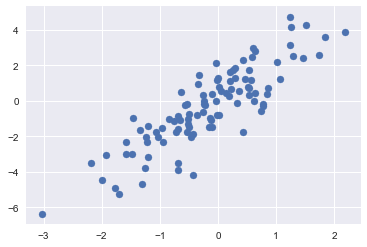

In [72]:
mean = [0,0]
cov = [[1,2],[2,5]]
X = np.random.multivariate_normal(mean, cov, 100)
import matplotlib.pyplot as  plt
import seaborn as sns
sns.set()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [65]:
ind = np.random.choice(X.shape[0],20,replace = False)
ind

array([46, 91, 25, 98, 55, 86, 24, 72,  1, 58,  8, 69, 49, 77, 84, 66, 92,
       88, 31, 99])

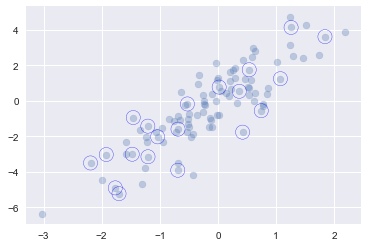

In [76]:
selections = X[ind]
plt.scatter(X[:,0],X[:,1],alpha = 0.3)
plt.scatter(selections[:,0],selections[:,1],facecolor = 'none',s= 200,edgecolors= 'b')
plt.show()

### Example2： Binning Data

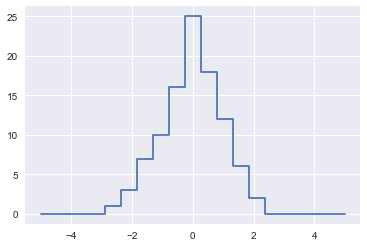

In [85]:
np.random.seed(40)
x = np.random.randn(100)
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)
i = np.searchsorted(bins,x)
np.add.at(counts,i,1) # 在i的位置上+1
plt.plot(bins,counts,linestyle = 'steps')
plt.show()

(array([  0.,   0.,   0.,   0.,   1.,   3.,   7.,  10.,  16.,  25.,  18.,
         12.,   6.,   2.,   0.,   0.,   0.,   0.,   0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

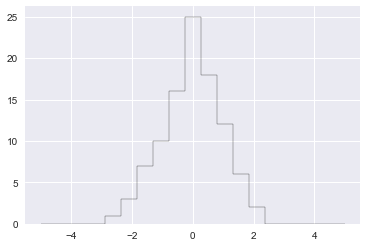

In [89]:
# 当然会有更简单的API绘制bin图
plt.hist(x,bins,histtype = 'step',color = 'black')